## Лайфкодинг 2

In [1]:
# импортируем библиотеку  PANDAS b matplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# открываем файл, ставим разделитель '\t'
try:
    df= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df= pd.read_csv('real_estate_data.csv', sep='\t')
# устанавливаем отображение количества столбцов экране 
pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')# так можем "разукрасить" данные

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


In [5]:
df.dropna(subset=['floors_total', 'locality_name'], inplace=True) # удаляем ненужные столбцы

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())# высоту потолков заменяем на медиану
# они во всех квартирайх одинаковы, уникальность низкая

Понятно, что пользователь, если продает аппатртаменты - обязательно укажет на это, если не аппартаменты - может проигнорировать)

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Заменим пропуски в зависимости от количества комнат, но уточним через коэфициент)

In [8]:
df['liv_coef'] = df['living_area']/df['total_area'] #создадим коэффициенты, чтоб уточнить данные, 
df['kit_coef'] = df['kitchen_area']/df['total_area']#разделив площади (жилые и кухни) на общую

In [9]:
df.corr().style.background_gradient('coolwarm')# посмотрим что больше всего коррелирует с площадями - это количсетво комнат

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_coef,kit_coef
total_images,1.000000,0.105026,0.116969,0.099759,0.004470,0.009822,0.105551,0.032781,0.010402,-0.028201,-0.024670,0.106896,0.117274,-0.002701,-0.048103,0.020955,-0.006017,-0.011352,-0.003995,-0.027340,-0.000314,-0.025921
last_price,0.105026,1.000000,0.653621,0.363191,0.064411,-0.006745,0.566380,0.026842,0.026981,-0.025084,-0.008801,0.520362,0.030223,-0.026216,-0.206353,0.151492,-0.016529,0.160735,-0.085836,0.080858,0.002711,-0.088965
total_area,0.116969,0.653621,1.000000,0.758735,0.080765,-0.075252,0.939771,-0.024368,0.029748,-0.072000,-0.034942,0.609248,0.050646,-0.030466,-0.231181,0.165890,-0.021266,0.163757,-0.100140,0.149974,0.143367,-0.317767
rooms,0.099759,0.363191,0.758735,1.000000,0.047958,-0.227913,0.846117,-0.151341,0.000399,-0.146068,-0.087735,0.270342,0.019941,-0.060975,-0.184096,0.137806,-0.053719,0.093600,-0.060119,0.126969,0.482038,-0.590569
ceiling_height,0.004470,0.064411,0.080765,0.047958,1.000000,-0.026747,0.078636,-0.012604,0.146555,0.000381,0.017674,0.071585,0.043262,-0.018764,-0.075420,0.056845,-0.019055,0.063707,-0.047483,0.018098,0.012576,0.008685
floors_total,0.009822,-0.006745,-0.075252,-0.227913,-0.026747,1.000000,-0.168940,0.678010,-0.026402,0.070224,0.050844,0.164803,0.195018,0.108547,0.018743,-0.252490,0.097608,-0.122799,0.040003,-0.052410,-0.366424,0.350713
living_area,0.105551,0.566380,0.939771,0.846117,0.078636,-0.168940,1.000000,-0.096676,0.027017,-0.056307,-0.033756,0.428909,0.020542,-0.057428,-0.230576,0.184878,-0.050694,0.149785,-0.082830,0.142135,0.419134,-0.481636
floor,0.032781,0.026842,-0.024368,-0.151341,-0.012604,0.678010,-0.096676,1.000000,-0.013234,0.035946,0.036184,0.136545,0.173955,0.073129,0.008336,-0.163601,0.072988,-0.076240,0.026467,-0.039042,-0.264511,0.245561
is_apartment,0.010402,0.026981,0.029748,0.000399,0.146555,-0.026402,0.027017,-0.013234,1.000000,-0.003641,-0.002462,0.049224,0.042962,0.016508,0.003734,0.020823,-0.033553,0.024097,0.003303,0.015337,0.002015,0.023848
studio,-0.028201,-0.025084,-0.072000,-0.146068,0.000381,0.070224,-0.056307,0.035946,-0.003641,1.000000,-0.004216,nan,0.031010,-0.021707,-0.006864,-0.030857,0.006923,0.000813,0.001838,-0.021572,0.088896,nan


In [10]:
#liv_coef_dict = df.groupby('rooms')['liv_coef'].median().to_dict() # сгруппируем по количеству комнат, вычислим медианный
#kit_coef_dict = df.groupby('rooms')['kit_coef'].median().to_dict() # коэффициент и в словарь)

In [11]:
#df['liv_coef'] = (df['rooms'].map(liv_coef_dict))*df['total_area'] # воспользуемся map этот метод меняет на значение из словаря
#df['kit_coef'] = (df['rooms'].map(kit_coef_dict))*df['total_area'] # в зависимости от значения в ключевом столбце

In [12]:
# а тут просто сократим код, исключить ненужные переменные
df['living_area'] = df['living_area'].fillna((df['rooms'].map(df.groupby(
    'rooms')['liv_coef'].median().to_dict()))*df['total_area'])

df['kitchen_area'] = df['kitchen_area'].fillna((df['rooms'].map(df.groupby(
    'rooms')['kit_coef'].median().to_dict()))*df['total_area'])

df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['days_exposition'] = df['days_exposition'].fillna(0)

In [13]:
round((df.isna().mean()*100),2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height           0.00
floors_total             0.00
living_area              0.00
floor                    0.00
is_apartment             0.00
studio                   0.00
open_plan                0.00
kitchen_area             0.00
balcony                 48.70
locality_name            0.00
airports_nearest        23.44
cityCenters_nearest     23.34
parks_around3000        23.34
parks_nearest           65.92
ponds_around3000        23.34
ponds_nearest           61.65
days_exposition          0.00
liv_coef                 7.91
kit_coef                 9.43
dtype: float64

In [14]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
def no_upper(string): 
    '''
    Функция берет на вход строку
    проверяем каждый символ строки на большую буква
    как только большая буква попадается ретурним остаток строки от большой буквы включительно 
    до последнего символа
    '''
    for i in range(len(string)):
        if string[i].isupper():
            return string[i: len(string)]

In [16]:
df['New_localiti'] = df['locality_name'].apply(no_upper) # применяем и все ок)

Сделаеим переменную размером  5% по 95% квантиль, для красивого отображения графика.

In [17]:
X_1 = df.loc[(df['last_price'] >= df['last_price'].quantile(.05))&(
    df['last_price'] <= df['last_price'].quantile(.95)), 'last_price']

Вариант отображения графика при помощи библиотеки mathplotlib

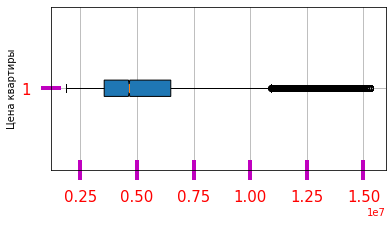

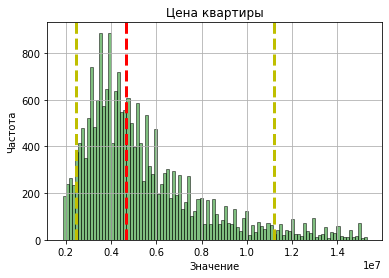

In [18]:
plt.figure(figsize =(6, 3)) # задаем размер фигуры

plt.boxplot(X_1, # строим боксплот
            notch=True, # формируем красивый "разрезик" в центре
            sym="o", # задаем символ выброса
            vert=False,     # повернем боксплок
            widths = 0.1,   # задаем толщину линий
            patch_artist = True)    # заливка боксплота
plt.ylabel('Цена квартиры')    # подпишем 
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  Длинна делений
               width = 4,     #  Ширина делений
               color = 'm',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 15,    #  Размер подписи
               labelcolor = 'r'    #  Цвет подписи
             )    #  Поворот подписей

plt.grid()     # отобразим сетку
plt.show()     # отобразим сам график

plt.figure(figsize =(6, 4)) # сформируем размер для гистограммы

hist = X_1.plot(            # строим график
                kind='hist',   # говорим, что это гистограмма
                bins=100,     # задаем размер корзин
                alpha=0.5,    # прозрачность графика
                ec='black',   # цвет обводки
                color='green',  # цвет графика
                )
plt.axvline(x=X_1.median(),   # добавил линию медианы
                linewidth=3,   # толщина линии
                color='red',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x=X_1.quantile(.05),   # добавил линию 5% квантили
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.axvline(x=X_1.quantile(.95),  # добавил линию 95% квантили
                linewidth=3, 
                color='y', 
                linestyle='--')
plt.title('Цена квартиры')  # Заголовок
plt.xlabel('Значение')  # подпишем ось Х
plt.ylabel('Частота')   # подпишем ось У
plt.grid()  # сетка
plt.show()  # отображаем график

In [19]:
def my_bins(df,value):
    '''
    Сделаем функцию которая отобразит нужное количество корзин 
    '''    
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return  100
    elif df[value].max() > 1000:
        return  200
    else: return 20

In [20]:
def my_hist(df, col):
    '''
    А теперь перенесем все что мы делали в предыдущей части, перенесем в функцию)
    '''
    coef_bins = 0.005
    X_1 = df.loc[(df[col] >= df[col].quantile(.05))&(df[col] <= df[col].quantile(.95)), col]
    plt.figure(figsize =(6, 2))
    plt.boxplot(X_1, 
            notch=True, 
            sym="o", 
            vert=False,
            widths = 0.1, 
            patch_artist = True)
    plt.ylabel('Ящие с усами ' + col)
    plt.tick_params(axis = 'both',   
               which = 'major',    
               direction = 'inout',    
               length = 20,    
               width = 4,     
               color = 'm',    
               pad = 10,    
               labelsize = 15,    
               labelcolor = 'r'    
             )    
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    hist = X_1.plot(
                kind='hist', 
                bins=my_bins(df, col), 
                alpha=0.5, 
                ec='black',
                color='green',
                )
    plt.axvline(x=X_1.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
    plt.axvline(x=X_1.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.axvline(x=X_1.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    print('--------------------------------------------------------------')

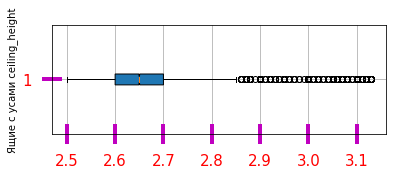

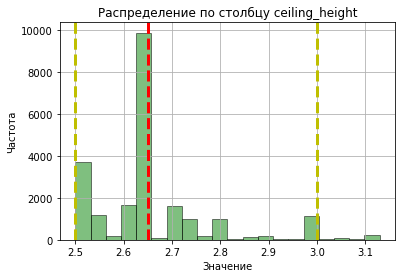

--------------------------------------------------------------


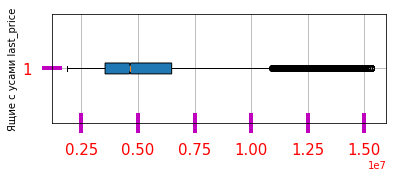

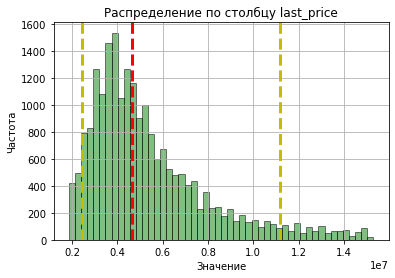

--------------------------------------------------------------


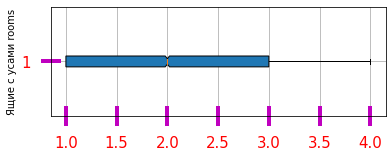

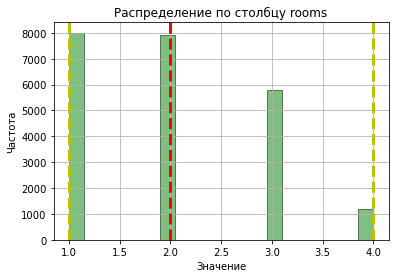

--------------------------------------------------------------


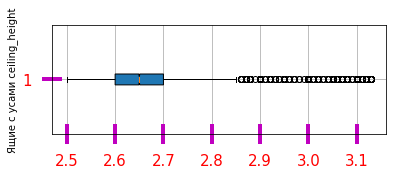

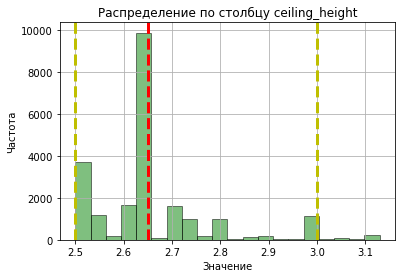

--------------------------------------------------------------


In [21]:
# через цикл построим нужные гистограммы
eda_list = ['ceiling_height', 'last_price', 'rooms', 'ceiling_height']
for i in eda_list:
    my_hist(df, i)  

In [22]:
# сформируем данные для построение субплотов
data1 = df.groupby('rooms')[['last_price']].mean()
data2 = df.groupby('New_localiti')[['last_price']].median().sort_values(by = 'last_price', ascending = False)


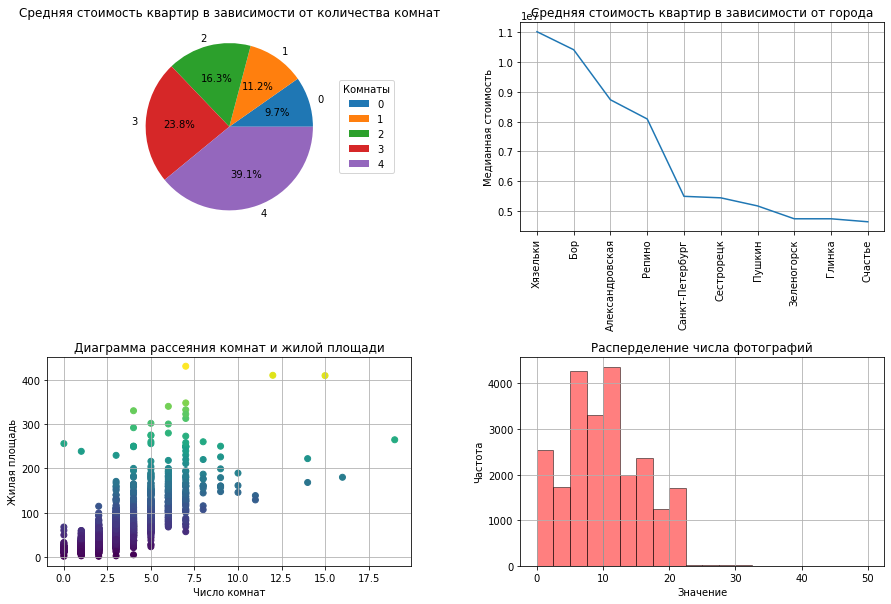

In [23]:
# формируем субплот
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
# для каждого "квадрата" сформируем свой график
axes[0,0].set_title('Средняя стоимость квартир в зависимости от количества комнат') # заголовок
axes[0,0].pie(data1['last_price'].head(5), autopct='%1.1f%%', labels = data1.index.to_list()[0:5]) # построим "пирог"
axes[0,0].legend(title="Комнаты",  # сформируем легенду
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


axes[0,1].set_ylabel('Медианная стоимость')   #второй квардрат - подпишем ось У
axes[0,1].set_title('Средняя стоимость квартир в зависимости от города') # заголовок
axes[0,1].plot(data2['last_price'].head(10)) # строим линейный график
axes[0,1].set_xticklabels(labels = data2.index.to_list()[0:10], rotation=90) # формируем подписи по оси Х
axes[0,1].grid() # добавим сетку


axes[1,0].set_ylabel('Жилая площадь') #
axes[1,0].set_xlabel('Число комнат') #подпишем ось Х
axes[1,0].set_title('Диаграмма рассеяния комнат и жилой площади') #второй квардрат - подпишем ось У
axes[1,0].scatter(x = df['rooms'], y = df['living_area'], c = df['living_area']) # диаграмма рассеяния
axes[1,0].grid() # сетка


axes[1,1].set_ylabel('Частота') # четвертый квадрат
axes[1,1].set_xlabel('Значение')
axes[1,1].set_title('Расперделение числа фотографий')
axes[1,1].hist(df['total_images'], # построим гистограмму
                bins=20, 
                alpha=0.5, 
                ec='black',
                color='red',
                )
axes[1,1].grid()

plt.subplots_adjust(wspace=0.3, hspace=0.6) # задаем отступы
plt.show()